http://brandonrose.org/clustering#Hierarchical-document-clustering

In [1]:
from time import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage, ward, dendrogram


In [2]:
s_listings = pd.read_csv('seattle/listings.csv')
s_listings.drop_duplicates('host_about', inplace=True)
s_listings.dropna(subset=['host_about'], axis=0, inplace=True)
host_abouts = s_listings['host_about']
len(host_abouts)

abouts = []
for host in host_abouts:
    if (type(host) is str):
        host = host.decode('utf-8').lower()
        abouts.append(host)
print abouts[1450]

sustainable business consultant and new father.  generally traveling by myself for work and with my family for pleasure.  usually we have multiple pieces of adventure gear with us- mountain & road bikes, cross-country skis, etc.

we live on the north end of capitol hill in seattle and have our 1bd/ 1bath room for rent on airbnb


In [3]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords += ['seattle', 'hidden', 'website']

In [4]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   #max_features=1000,
                                   stop_words=stopwords, 
                                   ngram_range=(1,2))
tfidf = tfidf_vectorizer.fit_transform(abouts).toarray()

In [5]:
tfidf.shape

(2011, 11718)

In [6]:
terms = tfidf_vectorizer.get_feature_names()

In [7]:
dist = 1 - cosine_similarity(tfidf)
linkage_matrix = ward(dist)

In [8]:
linkage_matrix = linkage(dist, method='complete', metric='cosine')

In [22]:
linkage_matrix

array([[  1.48000000e+02,   4.08000000e+02,   0.00000000e+00,
          2.00000000e+00],
       [  4.97000000e+02,   2.01100000e+03,   0.00000000e+00,
          3.00000000e+00],
       [  7.10000000e+02,   2.01200000e+03,   0.00000000e+00,
          4.00000000e+00],
       ..., 
       [  4.01300000e+03,   4.01700000e+03,   2.03536326e-03,
          1.99800000e+03],
       [  2.21200000e+03,   4.01800000e+03,   2.23567580e-03,
          2.00200000e+03],
       [  4.01500000e+03,   4.01900000e+03,   2.97898295e-03,
          2.01100000e+03]])

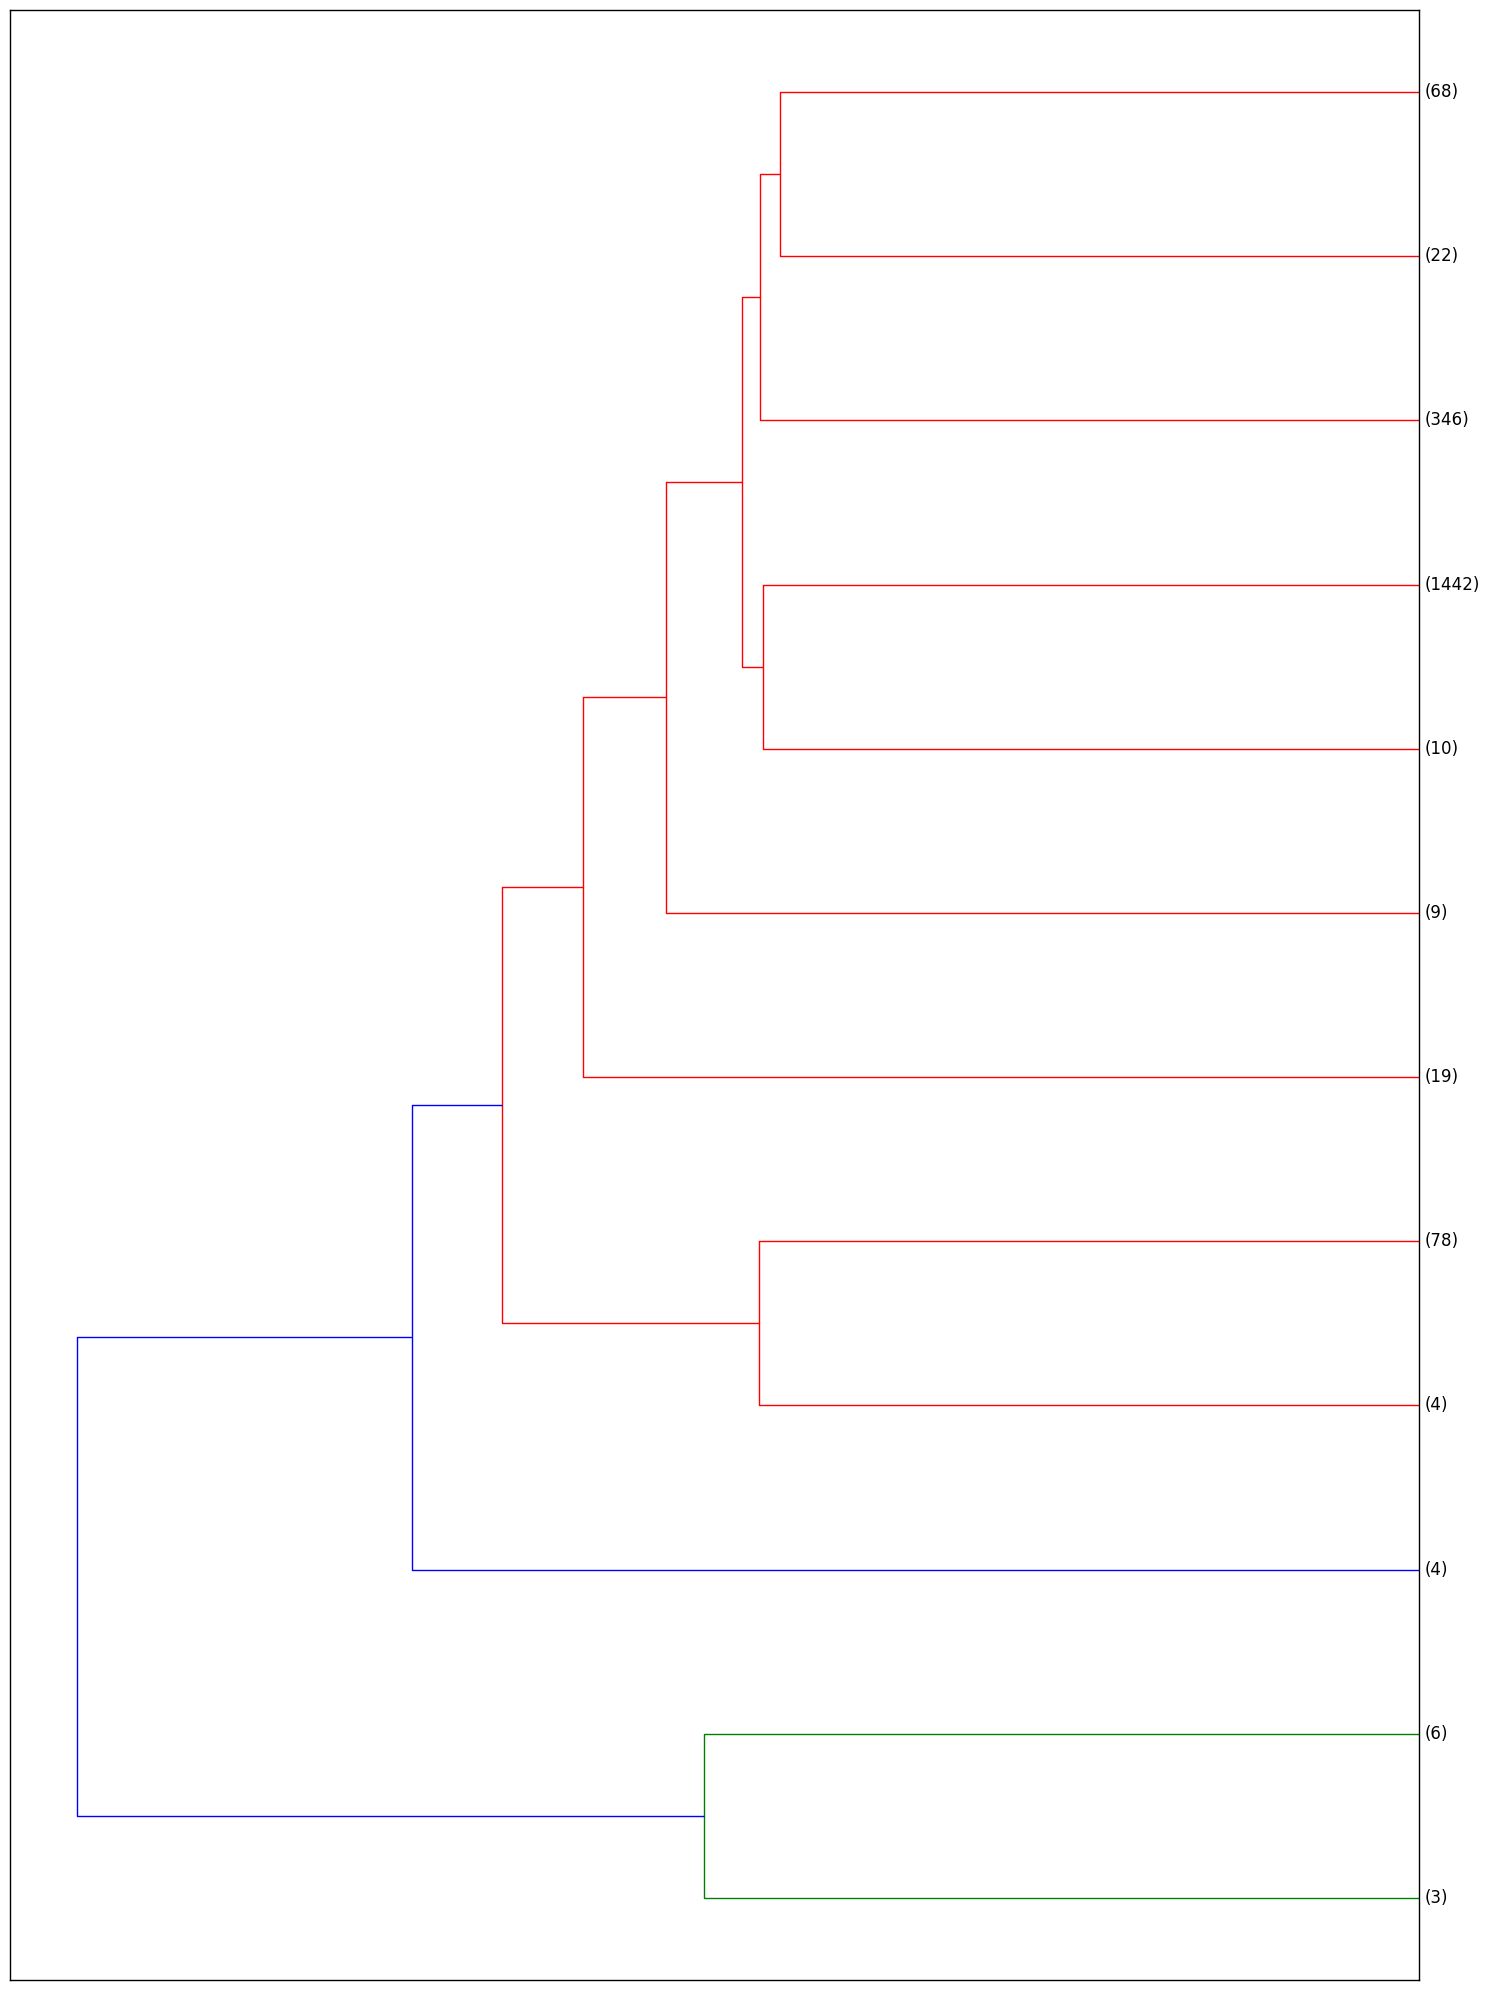

In [16]:
fig, ax = plt.subplots(figsize=(15, 20)) # set size
dend = dendrogram(linkage_matrix,
                p=12,
                truncate_mode='lastp', 
                orientation='left');

ax = dend

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
#plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [17]:
dend['leaves']

[3015, 3740, 2212, 3519, 4005, 3964, 3521, 3990, 4009, 4008, 3914, 4003]

In [20]:
terms[3015]

u'espresso'

In [12]:
ac = AgglomerativeClustering(n_clusters=10,
                            affinity='cosine',
                            compute_full_tree=False,
                            linkage='average')

In [13]:
ac.fit(tfidf)

AgglomerativeClustering(affinity='cosine', compute_full_tree=False,
            connectivity=None, linkage='average',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x106c44b18>)

In [14]:
set(ac.labels_)

{0, 9}

In [15]:
print "Top terms per cluster:"
print
#sort cluster centers by proximity to centroid
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1] 

for i in range(k):
    print "Cluster %d words:" % i
    
    for ind in order_centroids[i, :8]: #replace 10 with n words per cluster
        print terms[ind]
    print

Top terms per cluster:



NameError: name 'kmeans' is not defined

In [ ]:
df = pd.DataFrame(abouts)

In [ ]:
df['cluster'] = ac.labels_

In [ ]:
df.describe()